In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("evgeni_set.csv")
df['age'] = df['age']/110 #нормализация

In [4]:
#Меня не устраивает что  в train_test_split может в тестовую выборку попасть 0 инфарктов или все 100
#поэтому разделю вручную и соеденю после деления обратно
df_heartattack_x = df[df['minf']==1].iloc[:, 1:]
df_heartattack_y = df[df['minf']==1].iloc[:, 0]
df_no_heartattack_x = df[df['minf']==0].iloc[:, 1:]
df_no_heartattack_y = df[df['minf']==0].iloc[:, 0]

In [5]:
df_heartattack_x_train, df_heartattack_x_test, df_heartattack_y_train, df_heartattack_y_test = train_test_split(df_heartattack_x, df_heartattack_y, test_size=0.2)
df_no_heartattack_x_train, df_no_heartattack_x_test, df_no_heartattack_y_train, df_no_heartattack_y_test = train_test_split(df_no_heartattack_x, df_no_heartattack_y, test_size=0.2)

In [6]:
x_train = pd.concat((df_heartattack_x_train, df_no_heartattack_x_train), axis=0)
y_train = pd.concat((df_heartattack_y_train, df_no_heartattack_y_train), axis=0)
x_test = pd.concat((df_heartattack_x_test, df_no_heartattack_x_test), axis=0)
y_test = pd.concat((df_heartattack_y_test, df_no_heartattack_y_test), axis=0)

#проверка соответствия id после склейки
if all(y_test.index==x_test.index) and all(y_train.index==x_train.index):
    print('Данные склеены правильно')

Данные склеены правильно


1.Случайные деревья

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, f1_score, precision_score
assumption = round(np.sqrt(x_train.shape[0]))
iter_n_estimators = list(range(100, 900, 50))
iter_max_features = list(range(5, 9))
iter_max_depth = list(range(5, 14))

#все возможные комбинации параметров
a = [iter_n_estimators, iter_max_features, iter_max_depth]
iters = [list(x) for x in np.array(np.meshgrid(*a)).T.reshape(-1,len(a))]#все возможные комбинации параметров

In [8]:
%%time
results = {'iter_n_estimators':[], 'iter_max_features':[], 'iter_max_depth':[],
            'train_recall_score':[], 'train_f1_score':[], 'train_precision_score':[],
            'test_recall_score':[], 'test_f1_score':[], 'test_precision_score':[]}
for i in iters:
    try:
        results['iter_n_estimators'].append(i[0])
        results['iter_max_features'].append(i[1])
        results['iter_max_depth'].append(i[2])
        model = RandomForestClassifier(max_depth=i[2], max_features=i[1], n_estimators=i[0])
        model.fit(x_train, y_train)
        test_y_pred = model.predict(x_test)
        train_y_pred = model.predict(x_train)
        results['train_recall_score'].append(recall_score(y_train, train_y_pred))
        results['train_f1_score'].append(f1_score(y_train, train_y_pred))
        results['train_precision_score'].append(precision_score(y_train, train_y_pred))
        results['test_recall_score'].append(recall_score(y_test, test_y_pred))
        results['test_f1_score'].append(f1_score(y_test, test_y_pred))
        results['test_precision_score'].append(precision_score(y_test, test_y_pred))
    except:
        print(i)
        continue

Wall time: 12min 32s


In [9]:
df_results=pd.DataFrame(results)
df_results

,iter_n_estimators,iter_max_features,iter_max_depth,train_recall_score,train_f1_score,train_precision_score,test_recall_score,test_f1_score,test_precision_score
0,100,5,5,0.226190,0.368932,1.000000,0.095238,0.173913,1.000000
1,100,6,5,0.297619,0.446429,0.892857,0.142857,0.214286,0.428571
2,100,7,5,0.297619,0.446429,0.892857,0.142857,0.214286,0.428571
3,100,8,5,0.440476,0.596774,0.925000,0.238095,0.333333,0.555556
4,150,5,5,0.142857,0.250000,1.000000,0.095238,0.173913,1.000000
...,...,...,...,...,...,...,...,...,...
571,800,8,13,0.726190,0.802632,0.897059,0.428571,0.486486,0.562500
572,850,5,13,0.726190,0.802632,0.897059,0.428571,0.486486,0.562500
573,850,6,13,0.726190,0.802632,0.897059,0.428571,0.486486,0.562500
574,850,7,13,0.726190,0.802632,0.897059,0.428571,0.486486,0.562500


Text(0.5, 1.0, 'f1_score')

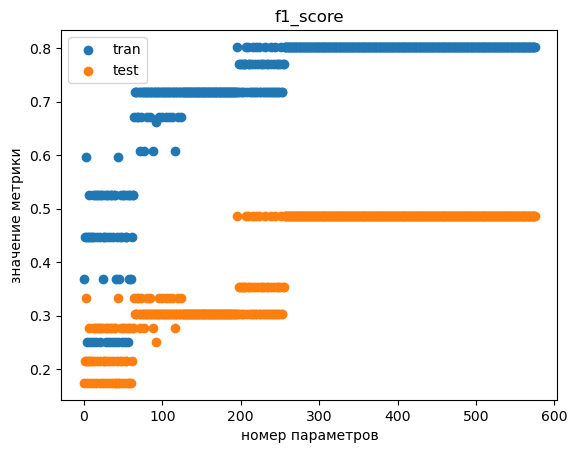

In [10]:
from matplotlib import pyplot as plt
plt.scatter(df_results.index, df_results['train_f1_score'], label='tran')
plt.scatter(df_results.index, df_results['test_f1_score'], label='test')
plt.legend()
plt.xlabel('номер параметров')
plt.ylabel('значение метрики')
plt.title('f1_score')

Text(0.5, 1.0, 'precision')

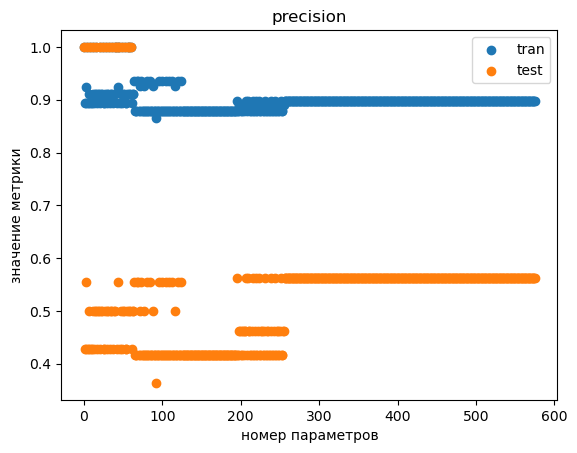

In [11]:
plt.scatter(df_results.index, df_results['train_precision_score'], label='tran')
plt.scatter(df_results.index, df_results['test_precision_score'], label='test')
plt.legend()
plt.xlabel('номер параметров')
plt.ylabel('значение метрики')
plt.title('precision')

Text(0.5, 1.0, 'recall_score')

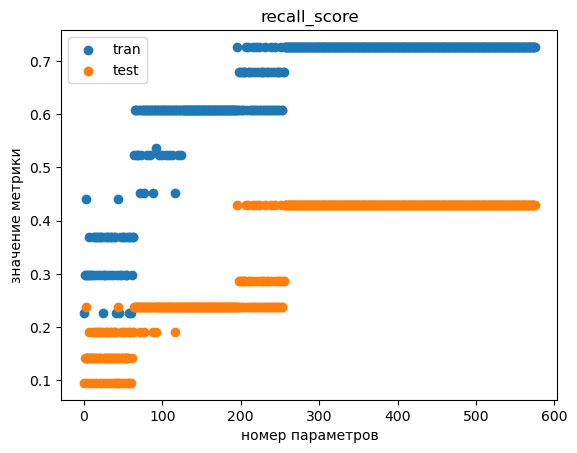

In [12]:
plt.scatter(df_results.index, df_results['train_recall_score'], label='tran')
plt.scatter(df_results.index, df_results['test_recall_score'], label='test')
plt.legend()
plt.xlabel('номер параметров')
plt.ylabel('значение метрики')
plt.title('recall_score')

In [13]:
model = RandomForestClassifier(max_depth=7, max_features=7, n_estimators=1100)
model = RandomForestClassifier(max_depth=7, max_features=7, n_estimators=1100)

In [14]:
df_results['test_recall_score'].max()

0.42857142857142855

In [15]:
df_results.iloc[260]

iter_n_estimators        150.000000
iter_max_features          5.000000
iter_max_depth             9.000000
train_recall_score         0.726190
train_f1_score             0.802632
train_precision_score      0.897059
test_recall_score          0.428571
test_f1_score              0.486486
test_precision_score       0.562500
Name: 260, dtype: float64

In [16]:
model = RandomForestClassifier(max_depth=9, max_features=5,n_estimators=150)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[782,   7],
       [ 12,   9]], dtype=int64)